# Importing Libraries & Data

In [3]:
!pip install opendatasets


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [526]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Rectangle
import matplotlib.colors as mcolors
import string
import opendatasets as od

sns.set()

plt.rcParams['figure.dpi'] = 144

In [527]:
!pwd

/Users/Reda/Developer/lifePredict/notebooks


In [528]:
od.download("https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated")
url = '/Users/Reda/Developer/lifePredict/notebooks/life-expectancy-who-updated/Life-Expectancy-Data-Updated.csv'
df = pd.read_csv(url)
df

Skipping, found downloaded files in "./life-expectancy-who-updated" (use force=True to force download)


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


# Data Preparation

In [529]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [530]:
y = df['Life_expectancy']
X = df.drop('Life_expectancy', axis=1)

In [531]:
numeric_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_t = pipeline.fit_transform(X)

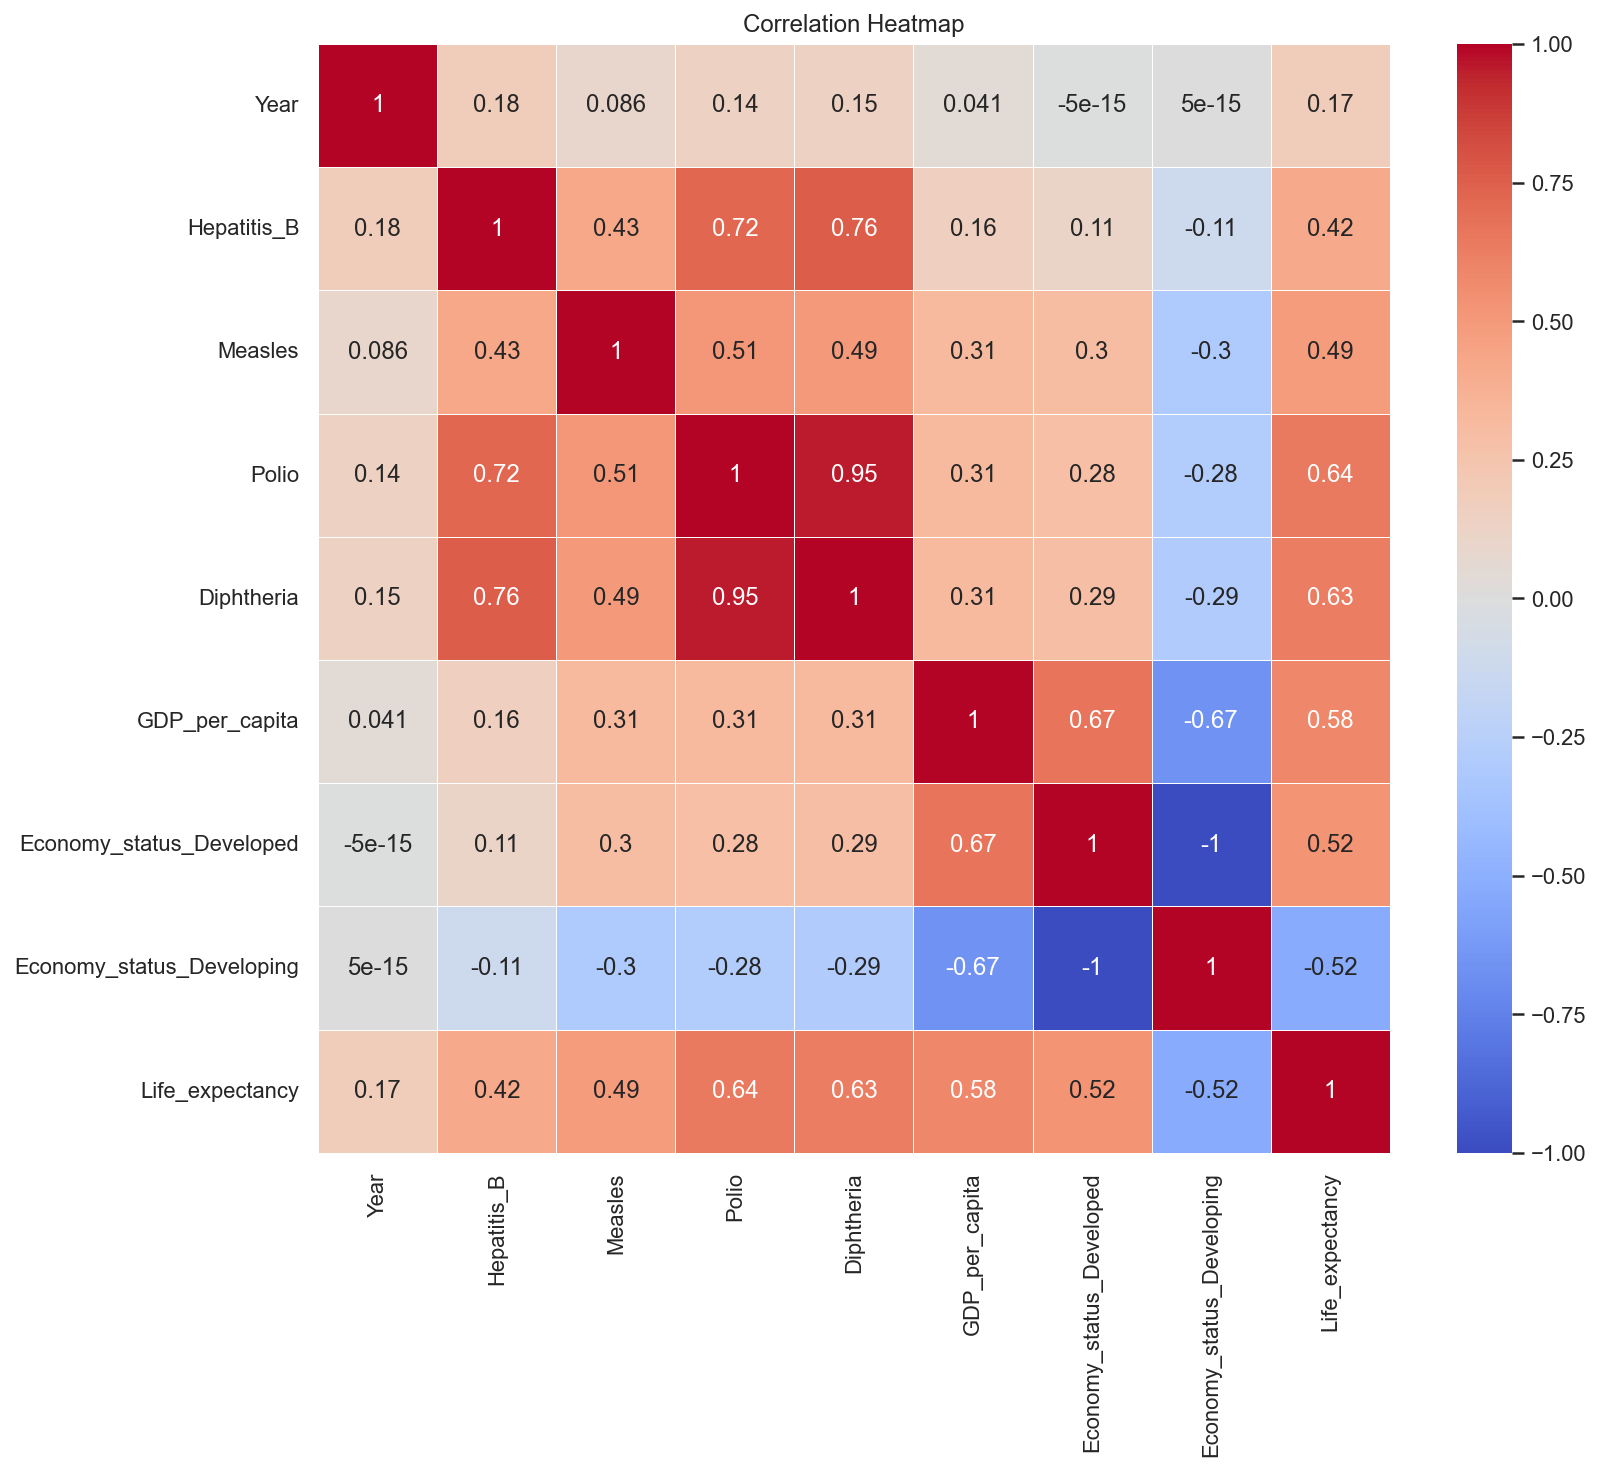

In [532]:
data_numeric_and_target = pd.concat([df[numeric_features], y], axis=1)

corr_matrix = data_numeric_and_target.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show();

# Creating random data for testing

In [533]:
# Create a new DataFrame with the desired columns
df_new = pd.DataFrame(columns=[
    'Country', 'Sex', 'Socpro', 'BMI',
    'Diet_Hab', 'Phys_act', 'Drink_stat', 'Smoking_stat', 'Chronic', 'Life_exp'
])

# Specify the number of rows you want per country
rows_per_country = 5

for _, country_row in df.iterrows():
    rows_to_add = []
    for _ in range(rows_per_country):
        new_row = {
            'Country': country_row['Country'],
            'Sex': np.random.choice([0, 1]),  # 0 for Female, 1 for Male
            'Socpro': np.random.randint(0, 5),  # Numerical representation of socio-professional category
            'BMI': np.exp(np.random.uniform(np.log(20), np.log(50))),  # Log scale for BMI
            'Diet_Hab': np.random.randint(0, 5),
            'Phys_act': np.random.randint(0, 5),
            'Drink_stat': np.random.randint(0, 5),
            'Smoking_stat': np.random.randint(1, 6),  # Increase impact of smoking
            'Chronic': np.random.poisson(2)  # Generate random number for chronic diseases
        }

        # Set Life_expectancy based on logical conditions
        life_expectancy = np.random.uniform(71, 72)  # Adjust the range to be more centered and realistic

        # Adjust life expectancy based on different factors
        life_expectancy += country_row['GDP_per_capita'] / 1700
        if new_row['BMI'] > 18:
            life_expectancy -= np.exp((new_row['BMI'] - 30) / 5.5)
        else:
            lbmi_factor = max(1, (18 - new_row['BMI']) / 3)  
            life_expectancy -= np.exp(bmi_factor / 5)
        life_expectancy += (5 - new_row['Diet_Hab']) * 0.5  
        life_expectancy += (5 - new_row['Phys_act']) * 0.5  
        life_expectancy -= (new_row['Smoking_stat'] ** 2.3 + new_row['Smoking_stat']*4.5)
        life_expectancy -= new_row['Drink_stat'] * 0.5  
        life_expectancy -= np.exp(new_row['Chronic']) * 0.02  

        # Adjust life expectancy based on sex
        life_expectancy += (3 if new_row['Sex'] == 0 else 0)  # Females generally live longer

        # Adjust life expectancy based on socio-professional category
        life_expectancy += new_row['Socpro'] * 0.5  # Lower impact increases with higher category

        new_row['Life_exp'] = max(0, life_expectancy) - 9  # Ensure life expectancy is not negative

        rows_to_add.append(new_row)

    df_new = pd.concat([df_new, pd.DataFrame(rows_to_add)], ignore_index=True)

# Convert relevant columns to numeric data types
numeric_columns = ['Sex', 'Socpro', 'Diet_Hab', 'Phys_act', 'Drink_stat', 'Smoking_stat', 'Chronic']
df_new[numeric_columns] = df_new[numeric_columns].astype(int)

In [534]:
df_new

,Country,Sex,Socpro,BMI,Diet_Hab,Phys_act,Drink_stat,Smoking_stat,Chronic,Life_exp
0,Turkiye,1,1,36.673098,3,2,3,3,3,40.368711
1,Turkiye,0,0,41.249479,4,0,2,3,4,39.162475
2,Turkiye,1,1,34.954806,0,1,2,4,1,27.828394
3,Turkiye,0,4,26.586840,4,1,0,2,0,62.449115
4,Turkiye,0,3,36.343100,2,3,3,4,0,29.423100
...,...,...,...,...,...,...,...,...,...,...
14315,Iceland,1,4,43.810232,3,3,0,1,1,77.845225
14316,Iceland,1,2,22.704037,0,0,0,3,0,70.533364
14317,Iceland,1,4,26.589051,1,3,0,5,3,32.634088
14318,Iceland,1,2,45.845616,2,4,4,4,1,32.350485


In [535]:
y_gen = df_new['Life_exp']
X_gen = df_new.drop('Life_exp', axis=1)
X_gen.dtypes

Country          object
Sex               int64
Socpro            int64
BMI             float64
Diet_Hab          int64
Phys_act          int64
Drink_stat        int64
Smoking_stat      int64
Chronic           int64
dtype: object

In [536]:
numeric_features = X_gen.select_dtypes(include=['int64','float64']).columns
categorical_features = X_gen.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_gent = pipeline.fit_transform(X_gen)

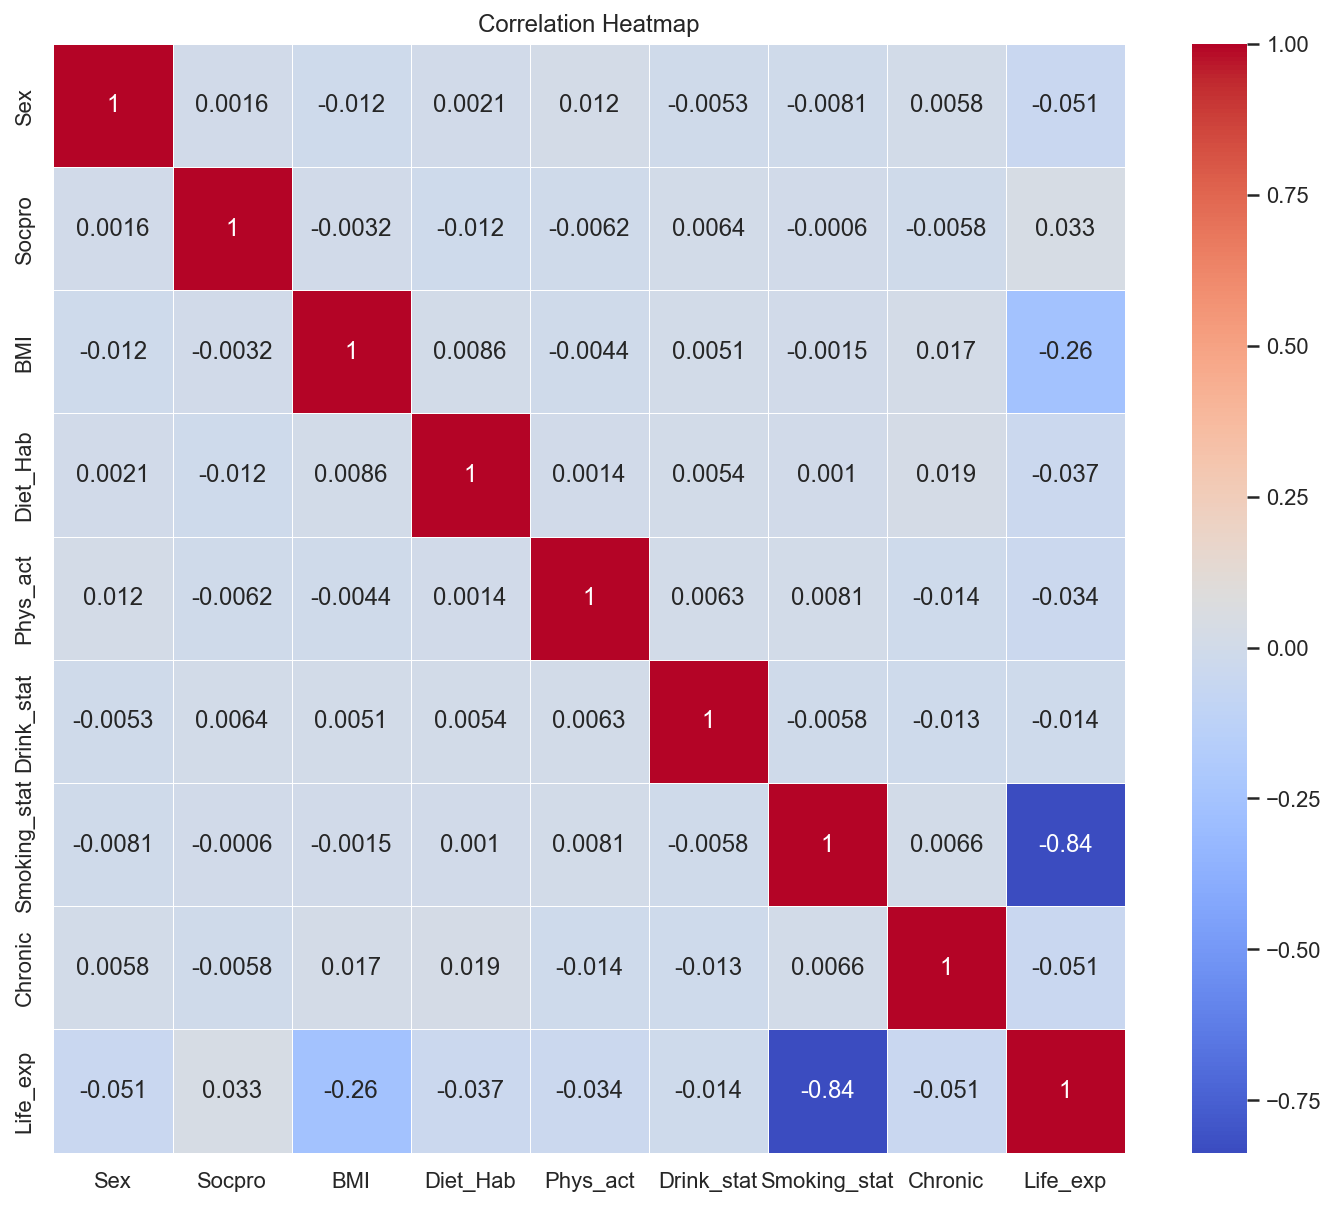

In [537]:
corr_matrix = df_new.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [538]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [539]:
print(X_gent.shape, y_gen.shape)

(14320, 187) (14320,)


In [540]:
degree = 2
model = Pipeline([
    ('regressor', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])

# Perform grid search
grid_search = GridSearchCV(model, param_grid={}, cv=5, scoring='r2')
grid_search.fit(X_gent, y_gen)

# Get the best cross-validated score
best_score = grid_search.best_score_
print("Best Cross-validated R^2 Score:", best_score)

# Get the best estimator (model) from the grid search
best_model = grid_search.best_estimator_

Best Cross-validated R^2 Score: 0.9854636174947939


In [541]:
model.fit(X_gent,y_gen)

Pipeline(steps=[('regressor', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

# Creating predict fake profiles

In [542]:
# Get unique countries from df_new
countries = df_new['Country'].unique()

# Function to generate a random profile
def generate_random_profile():
    return {
        'Country': np.random.choice(countries),
        'Sex': np.random.choice([0, 1]),
        'Socpro': np.random.randint(0, 5),
        'BMI': np.exp(np.random.uniform(np.log(20), np.log(50))),
        'Diet_Hab': np.random.randint(0, 5),
        'Phys_act': np.random.randint(0, 5),
        'Drink_stat': np.random.randint(0, 5),
        'Smoking_stat': np.random.randint(1, 6),
        'Chronic': np.random.poisson(2)
    }

In [543]:
# Generate 20 random profiles
random_profiles = [generate_random_profile() for _ in range(30)]

# Create a DataFrame with the random profiles
df_random_profiles = pd.DataFrame(random_profiles)

# Ensure correct data types
df_random_profiles['Sex'] = df_random_profiles['Sex'].astype(int)
df_random_profiles['Socpro'] = df_random_profiles['Socpro'].astype(int)
df_random_profiles['BMI'] = df_random_profiles['BMI'].astype(float)
df_random_profiles['Diet_Hab'] = df_random_profiles['Diet_Hab'].astype(int)
df_random_profiles['Phys_act'] = df_random_profiles['Phys_act'].astype(int)
df_random_profiles['Drink_stat'] = df_random_profiles['Drink_stat'].astype(int)
df_random_profiles['Smoking_stat'] = df_random_profiles['Smoking_stat'].astype(int)
df_random_profiles['Chronic'] = df_random_profiles['Chronic'].astype(int)

df_random_profiles

,Country,Sex,Socpro,BMI,Diet_Hab,Phys_act,Drink_stat,Smoking_stat,Chronic
0,Oman,0,3,39.552809,3,1,2,2,2
1,Solomon Islands,1,3,21.993591,3,2,3,1,5
2,Antigua and Barbuda,1,2,48.775636,3,1,4,1,3
3,Slovak Republic,0,4,49.751137,1,4,0,4,3
4,United States,0,4,35.448930,1,3,4,4,1
5,Japan,1,2,45.029375,3,0,4,3,1
6,Jamaica,1,1,49.724834,2,1,1,1,2
7,Gabon,0,0,24.213222,4,2,1,2,3
8,Burkina Faso,1,3,22.819769,3,4,1,4,3
9,Malta,1,1,21.824250,2,1,0,3,1


In [544]:
X_predict_gen = pipeline.transform(df_random_profiles)

In [545]:
results = df_random_profiles
results['life_expect'] = model.predict(X_predict_gen)

results

,Country,Sex,Socpro,BMI,Diet_Hab,Phys_act,Drink_stat,Smoking_stat,Chronic,life_expect
0,Oman,0,3,39.552809,3,1,2,2,2,59.879429
1,Solomon Islands,1,3,21.993591,3,2,3,1,5,51.740164
2,Antigua and Barbuda,1,2,48.775636,3,1,4,1,3,41.141390
3,Slovak Republic,0,4,49.751137,1,4,0,4,3,6.134187
4,United States,0,4,35.448930,1,3,4,4,1,54.064321
5,Japan,1,2,45.029375,3,0,4,3,1,40.187941
6,Jamaica,1,1,49.724834,2,1,1,1,2,36.021606
7,Gabon,0,0,24.213222,4,2,1,2,3,56.011402
8,Burkina Faso,1,3,22.819769,3,4,1,4,3,19.582662
9,Malta,1,1,21.824250,2,1,0,3,1,51.372017


In [546]:
a = df_random_profiles[:1]
b = df_random_profiles[:1]

In [547]:
b['BMI'] = 25
b

/var/folders/jf/x853gdbx5l504ym_yjk4kbn80000gn/T/ipykernel_37281/3833680046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['BMI'] = 25


,Country,Sex,Socpro,BMI,Diet_Hab,Phys_act,Drink_stat,Smoking_stat,Chronic,life_expect
0,Oman,0,3,25,3,1,2,2,2,59.879429


In [548]:
a_gen = pipeline.transform(a)
b_gen = pipeline.transform(b)

print(model.predict(a_gen))
print(model.predict(b_gen))

[59.87942853]
[67.98877183]


# Exporting model and preprocessor

In [549]:
import joblib

In [550]:
joblib.dump(model, 'model.pkl')
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

In [551]:
!pwd

/Users/Reda/Developer/lifePredict/notebooks


In [552]:
df_random_profiles.columns

Index(['Country', 'Sex', 'Socpro', 'BMI', 'Diet_Hab', 'Phys_act', 'Drink_stat',
       'Smoking_stat', 'Chronic', 'life_expect'],
      dtype='object')

In [553]:
#weight = 73
weight = 90
height = 185

bmi = weight / ((height/100)**2)

predict_data = [{'Country': 'Switzerland',
                     'Sex': 1,
                     'Socpro': 3,
                     'BMI': 100,
                     'Diet_Hab': 2,
                     'Phys_act': 1,
                     'Drink_stat': 3,
                     'Smoking_stat': 1,
                     'Chronic': 0}]


In [554]:
df = pd.DataFrame(predict_data)

data_array = df

data_array

,Country,Sex,Socpro,BMI,Diet_Hab,Phys_act,Drink_stat,Smoking_stat,Chronic
0,Switzerland,1,3,100,2,1,3,1,0


In [555]:
data_array_proproc = preprocessor.transform(data_array)

prediction = model.predict(data_array_proproc)

In [556]:
prediction

array([-199.75382439])